## This notebook is part of self learning Quantum Computing Algorithms

## Description: This program optimizes the stock portfolio

In [1]:
#import the libraries
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import data
df = data.DataReader(['AAPL', 'NKE', 'GOOGL', 'AMZN'], 'yahoo', start='2015/01/01', end='2019/12/31')

In [3]:
df.head()

Attributes  Adj Close                                         Close  \
Symbols          AAPL        NKE       GOOGL        AMZN       AAPL   
Date                                                                  
2014-12-31  25.057606  44.779621  530.659973  310.350006  27.594999   
2015-01-02  24.819241  44.257999  529.549988  308.519989  27.332500   
2015-01-05  24.120045  43.545448  519.460022  302.190002  26.562500   
2015-01-06  24.122320  43.289291  506.640015  295.290009  26.565001   
2015-01-07  24.460564  44.183491  505.149994  298.420013  26.937500   

Attributes                                          High             ...  \
Symbols           NKE       GOOGL        AMZN       AAPL        NKE  ...   
Date                                                                 ...   
2014-12-31  48.075001  530.659973  310.350006  28.282499  48.805000  ...   
2015-01-02  47.514999  529.549988  308.519989  27.860001  48.474998  ...   
2015-01-05  46.750000  519.460022  302.190002  27.162500  47.275002  ...   
2015-01-06  46.474998  506.640015  295.290009  26.857500  47.075001  ...   
2015-01-07  47.435001  505.149994  298.420013  27.049999  47.650002  ...   

Attributes         Low                   Open                         \
Symbols          GOOGL        AMZN       AAPL        NKE       GOOGL   
Date                                                                   
2014-12-31  530.200012  310.010010  28.205000  48.485001  537.739990   
2015-01-02  527.880005  306.959991  27.847500  48.275002  532.599976   
2015-01-05  517.750000  300.850006  27.072500  47.255001  527.150024   
2015-01-06  505.549988  292.380005  26.635000  46.945000  520.500000   
2015-01-07  503.649994  295.329987  26.799999  46.805000  510.950012   

Attributes                   Volume                                   
Symbols           AMZN         AAPL        NKE      GOOGL       AMZN  
Date                                                                  
2014-12-31  311.549988  165613600.0  4697400.0  1232400.0  2048000.0  
2015-01-02  312.579987  212818400.0  4985800.0  1324000.0  2783200.0  
2015-01-05  307.010010  257142000.0  6889200.0  2059100.0  2774200.0  
2015-01-06  302.239990  263188400.0  7576000.0  2722800.0  3519000.0  
2015-01-07  297.500000  160423600.0  7256000.0  2345900.0  2640300.0  

[5 rows x 24 columns]

In [4]:
# Closing price
df = df['Adj Close']

In [5]:
df.head()

Symbols,AAPL,NKE,GOOGL,AMZN
Date,,,,
2014-12-31,25.057606,44.779621,530.659973,310.350006
2015-01-02,24.819241,44.257999,529.549988,308.519989
2015-01-05,24.120045,43.545448,519.460022,302.190002
2015-01-06,24.122320,43.289291,506.640015,295.290009
2015-01-07,24.460564,44.183491,505.149994,298.420013


### Covariance and Correlation matrix

## $cov_{x,y} = \frac{\sum\limits_{i=1}^{N} \left(x_{i} - \bar{x}\right) \left(y_{i} - \bar{y}\right)}{N - 1}, \ r = \frac{\sum\limits_{i=1}^{N} \left(x_{i} - \bar{x}\right) \left(y_{i} - \bar{y}\right)}{\sqrt{\sum\limits_{i=1}^{N} \left(x_{i} - \bar{x}\right) \sum\limits_{i=1}^{N} \left(y_{i} - \bar{y}\right)}} \\ cov_{x,y} = \text{covariance between variable x and y} \\ r = \text{correlation coefficient} \\ x_{i} = \text{values of the x-variable in a sample} \\ \bar{x} = \text{mean of the values of the x-variable} \\ y_{i} = \text{values of the y-variable in a sample} \\ \bar{y} = \text{mean of the values of the y-variable} \\ N = \text{number of data values}$

In [6]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,AAPL,NKE,GOOGL,AMZN
Symbols,,,,
AAPL,0.000245,0.000084,0.000122,0.000142
NKE,0.000084,0.000219,0.000085,0.000092
GOOGL,0.000122,0.000085,0.000221,0.000176
AMZN,0.000142,0.000092,0.000176,0.000333


In [32]:
# Log of percentage change
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,AAPL,NKE,GOOGL,AMZN
Symbols,,,,
AAPL,1.000000,0.361188,0.524819,0.496704
NKE,0.361188,1.000000,0.387448,0.341680
GOOGL,0.524819,0.387448,1.000000,0.647952
AMZN,0.496704,0.341680,0.647952,1.000000


## Portfolio expected returns

## $E[R] = \sum\limits_{i=1}^{N} R_{i}P_{i} \\ E[R] = \text{expected return} \\ R_i = \text{return in scenario i} \\ P_i = \text{probability for the return} \ R_{i} \ \text{in scenario i} \\ N = \text{number of scenarios}$

In [7]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Symbols
AAPL     0.282997
NKE      0.192698
GOOGL    0.217545
AMZN     0.472289
dtype: float64

## $\sigma_{p}^{2} = \sum\limits_{i=1}^{N}\sum\limits_{j=1}^{N} w_i w_j \ cov_{i,j}$

In [8]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

In [9]:
num_assets = len(df.columns)
num_portfolios = 10000

In [10]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets) #random weights
    weights = weights/np.sum(weights) #normalize weights
    p_weights.append(weights) #assest weights
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its weights 
    p_ret.append(returns) #portfolio returns
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual(250 days) standard deviation = volatility
    p_vol.append(ann_sd) #portfolio volatility

In [11]:
data = {'Returns':p_ret, 'Volatility':p_vol}

In [12]:
for counter, symbol in enumerate(df.columns.tolist()):
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [13]:
portfolios  = pd.DataFrame(data)

In [14]:
# Dataframe of the 10000 portfolios created
portfolios.head() 

,Returns,Volatility,AAPL weight,NKE weight,GOOGL weight,AMZN weight
0,0.343630,0.209203,0.199189,0.263573,0.067762,0.469477
1,0.312879,0.198385,0.312610,0.341607,0.018551,0.327232
2,0.264271,0.203454,0.444589,0.064158,0.415799,0.075454
3,0.307682,0.208006,0.029314,0.229406,0.372602,0.368678
4,0.335636,0.216748,0.405676,0.015218,0.218284,0.360821


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

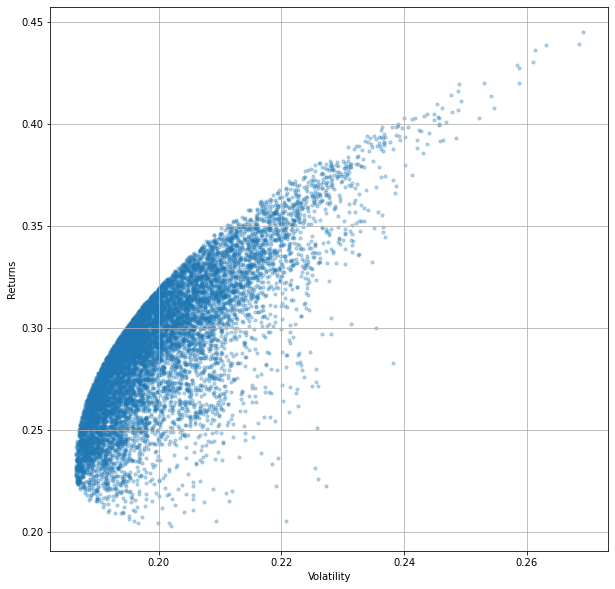

In [15]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [16]:
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
min_vol_port

Returns         0.238028
Volatility      0.186508
AAPL weight     0.258582
NKE weight      0.397005
GOOGL weight    0.291721
AMZN weight     0.052692
Name: 3043, dtype: float64

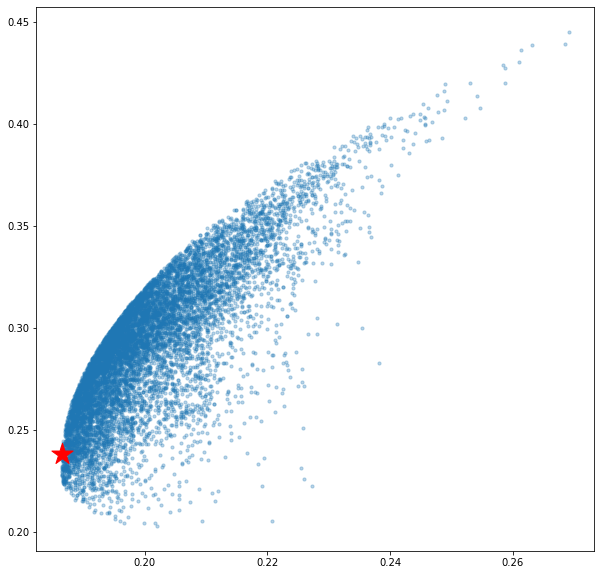

In [17]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

## $\text{Sharpe ratio} = \frac{R_{p} - R_{f}}{\sigma_{p}} \\ \text{where:} \\ R_{p} = \text{return of portfolio} \\ R_{f} = \text{risk-free rate} \\ \sigma_{p} = \text{standard deviation of the portfolio}$

In [18]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.419498
Volatility      0.248912
AAPL weight     0.173649
NKE weight      0.069491
GOOGL weight    0.001929
AMZN weight     0.754931
Name: 2044, dtype: float64

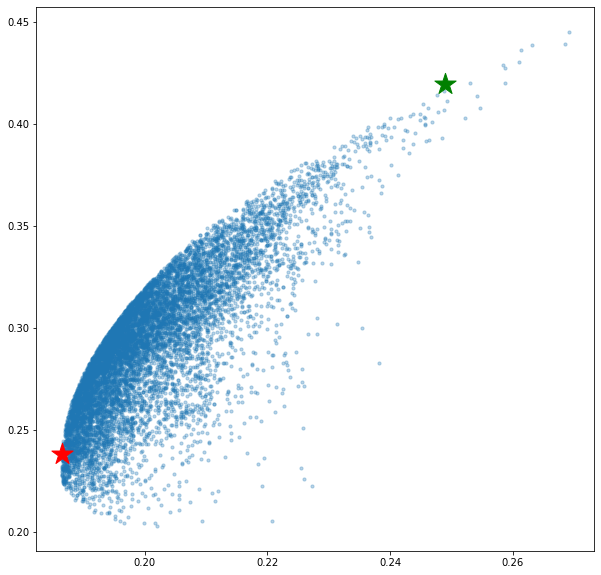

In [19]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)